In [3]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
from IPython.display import clear_output

In [88]:
a = np.array([1, 2])
b = np.array([3, 4])
np.sum([a, b], axis=0)

array([4, 6])

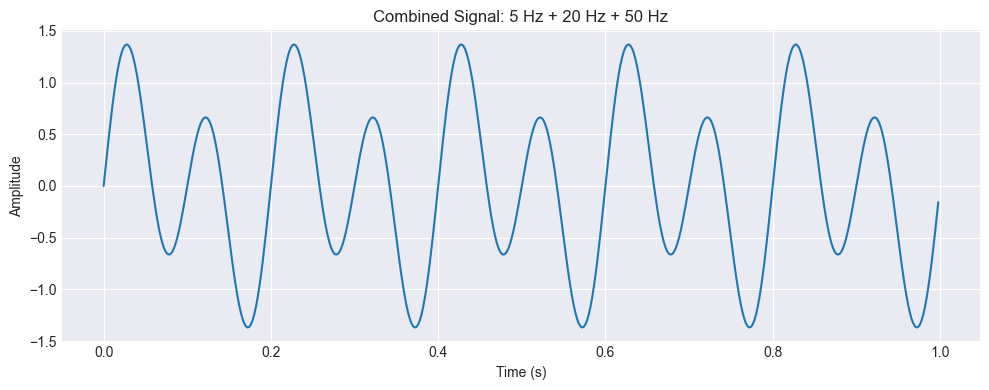

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling settings
fs = 500 # Sampling frequency in Hz
T = 1      # Duration in seconds
t = np.linspace(0, T, int(fs*T), endpoint=False)  # Time vector

# Create sine waves
freqs = [5, 10]           # Frequencies in Hz
amps = [0.5, 1.0]        # Amplitudes for each frequency
signal = np.sum([a * np.sin(2 * np.pi * f * t) for a, f in zip(amps, freqs)], axis=0)

# Plot the combined signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title("Combined Signal: 5 Hz + 20 Hz + 50 Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [111]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


import matplotlib.pyplot as plt
import numpy as np

fig,axs = plt.subplots(1, 1, figsize=(6, 6))

f = 0.2 # cycles per second
omega = 2 * np.pi * f # radians per second
sampling_freq_ms = 10 # how often do we want to sample the signal
t = list(range(0, 5000, 10)) # sampling times in milliseconds


def update(t):
    theta =  (omega * t / 1000) % (2 * np.pi)  * - 1# angle in radians
    z = np.exp(1j*theta) 
    x, y = z.real, z.imag

    axs.cla()
    axs.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1)
    axs.text(x * 1.05, y * 1.05, f"$z = {abs(z):.2f}e^{{i{np.angle(z):.2f}}}$", fontsize=12)
    axs.axhline(0, color='gray', linewidth=0.5)
    axs.axvline(0, color='gray', linewidth=0.5)
    axs.set_xlim(-3, 3)
    axs.set_ylim(-3, 3)
    #axs.set_gca().set_aspect('equal', adjustable='box')
    axs.set_xlabel('Real')
    axs.set_ylabel('Imaginary')
    axs.set_title(f"f: {f:0.2f}, Omega: {omega:0.2f}, Theta: {theta/np.pi:0.2f} pi, Time:{t} ms ")
    axs.grid(True)

#plt.show()


ani = FuncAnimation(fig, update, frames=t, interval=10, repeat=True)
plt.close(fig)
video_html = ani.to_html5_video().replace('<video', '<video muted')
HTML(video_html)